In [11]:
%matplotlib inline 

import argparse
import torch
import torch.nn as nn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import slot_attention_obj_discovery_stacked.data as data
from slot_attention_obj_discovery.slot_attention_obj_discovery import SlotAttention_model

#matplotlib.use("Agg")
torch.set_num_threads(30)
torch.manual_seed(0)

In [17]:
class WrappedModel(nn.Module):
    def __init__(self, module):
        super(WrappedModel, self).__init__()
        self.module = module
    def forward(self, x):
        return self.module(x)


def get_args():
    parser = argparse.ArgumentParser()
    args = parser.parse_args("")

    # generic params
#     args.resume = "/Users/ml-wstammer/Documents/PhD/repositories/XIConcept/CLEVR/slot_attention_obj_discovery_stacked/logs/slot-attention-clevr-objdiscovery-14"
    args.resume = "../slot_attention_obj_discovery_stacked/logs/slot-attention-clevr-objdiscovery-14"
    args.data_dir = "/media/disk2/datasets/CLEVR_v1"
    args.epochs = 500
    args.no_cuda = True
    args.num_workers = 4
    args.warm_up_steps = 10000
    args.lr = 0.0004
    args.batch_size = 4
    args.n_slots = 11
    args.n_attr_slots = 5
    args.n_iters_slot_att = 3
    args.n_attr = 18

    # if args.device_list_parallel is not None:
    #     args.device_list_parallel = [int(elem) for elem in args.device_list_parallel[0].split(',')]

    return args

In [18]:
args = get_args()

dataset_test = data.CLEVR(
    args.data_dir, "val",
)

test_loader = data.get_loader(
    dataset_test,
    batch_size=args.batch_size,
    num_workers=args.num_workers,
    shuffle=False,
)

net = SlotAttention_model(n_slots=args.n_slots, n_iters=args.n_iters_slot_att, n_attr=args.n_attr,
                                encoder_hidden_channels=64, attention_hidden_channels=128,
                                decoder_hidden_channels=64, decoder_initial_size=(8, 8))

net = WrappedModel(net)

start_epoch = 0
if args.resume:
    print("Loading ckpt ...")
    log = torch.load(args.resume, map_location=torch.device('cpu'))
    weights = log["weights"]
    net.load_state_dict(weights, strict=True)
    # start_epoch = log["args"]["epochs"]

if not args.no_cuda:
    net = net.to("cuda:0")

sample = next(iter(test_loader))




Loading ckpt ...


In [19]:
torch.manual_seed(0)
imgs, masks = sample
recon_combined, recons, masks, slots = net.forward(imgs)
sample_idx = 1
slots = slots[sample_idx].unsqueeze(dim=0)

In [20]:
print(recons[0, 1].shape)
print(imgs[0].shape)
print(masks.shape)

torch.Size([3, 128, 128])
torch.Size([3, 128, 128])
torch.Size([4, 11, 1, 128, 128])


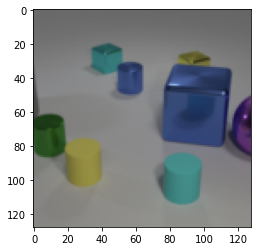

In [21]:
plt.figure()
plt.imshow(np.moveaxis(imgs[sample_idx].detach().cpu().numpy(), [0, 1, 2], [2, 0, 1]) / 2. + 0.5)
plt.show()

0


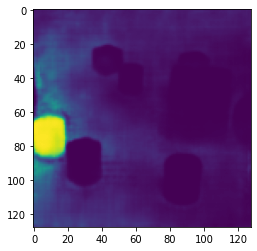

1


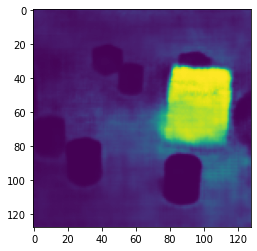

2


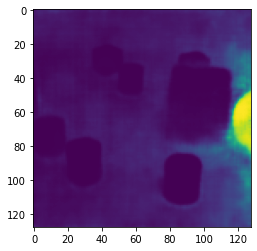

3


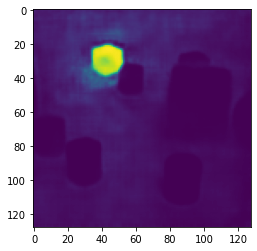

4


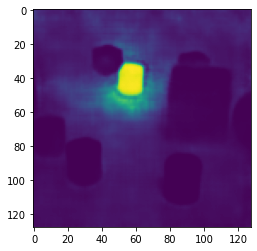

5


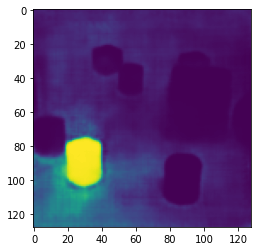

6


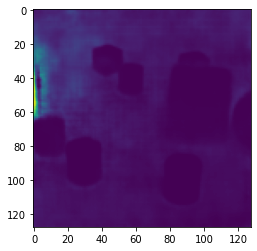

7


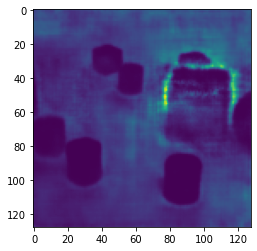

8


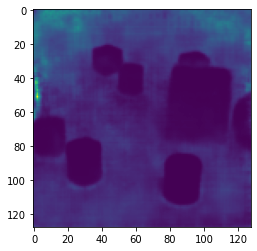

9


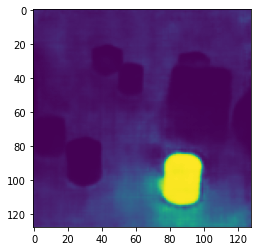

10


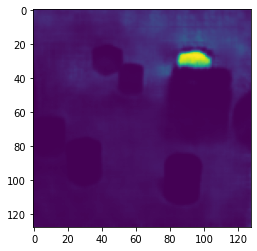

In [22]:
for i in range(len(masks[sample_idx])):
    plt.figure()
    print(i)
    plt.imshow(np.moveaxis(masks[sample_idx, i].detach().cpu().numpy(), [0, 1, 2], [2, 0, 1]) / 2. + 0.5)
    plt.show()

In [23]:
pos_1= 5 # 5
pos_2= 9 # 9

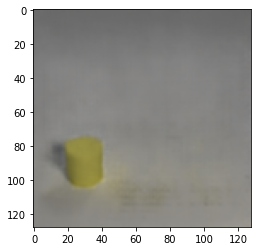

In [24]:
plt.figure()
plt.imshow(np.moveaxis(recons[sample_idx, pos_1].detach().cpu().numpy(), [0, 1, 2], [2, 0, 1]) / 2. + 0.5)
plt.show()

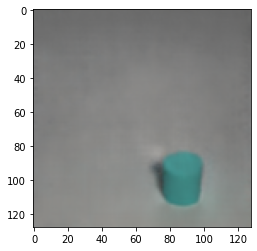

In [25]:
plt.figure()
plt.imshow(np.moveaxis(recons[sample_idx, pos_2].detach().cpu().numpy(), [0, 1, 2], [2, 0, 1]) / 2. + 0.5)
plt.show()

In [26]:
manip_slots = torch.clone(slots)
#for s in manip
s1 = torch.clone(manip_slots[0, pos_1])
s2 = torch.clone(manip_slots[0, pos_2])
#manip_slots[0, 1, :10] = 0.
#manip_slots[1, 0, 50:] = 0.
#manip_slots[1, 0]



In [27]:
s1

tensor([ 2.3552e-02,  5.6526e-01,  1.2419e+00, -1.1516e-01, -7.2296e-01,
        -2.6636e-01,  2.7210e-02, -3.5055e-02, -1.1459e-03, -4.4111e-01,
        -5.0051e-01,  2.7522e-01,  1.0937e+00,  5.3811e-01, -2.6082e-01,
        -3.8032e-01,  6.3001e-01, -3.8247e-01, -4.5970e-01,  1.3507e-01,
         2.3522e-02, -1.1338e+00, -4.8797e-01, -3.3768e-01,  1.3524e-01,
         3.2056e-01,  1.8563e-01,  3.1387e-01,  1.0144e+00, -4.6292e-01,
        -8.5687e-01,  2.2446e-01, -2.9739e-01,  3.7558e-01, -1.5621e-01,
         3.0568e-01, -1.1809e-01,  3.6656e-01, -1.2020e+00, -2.5884e-01,
        -5.9452e-02,  3.9835e-01, -4.2565e-01, -1.9861e-01, -1.5210e-01,
         6.4395e-01,  1.7276e-01,  1.7116e-01,  1.3226e+00, -1.3975e-01,
        -7.6988e-01,  3.7725e-03,  3.6374e-01,  1.4244e-02, -1.9773e-01,
         1.2206e+00, -4.1505e-01, -9.4667e-02, -3.4509e-02,  2.7114e-01,
         3.9983e-01,  1.2177e+00,  2.9589e-01,  7.7350e-01],
       grad_fn=<CloneBackward>)

In [28]:
s2

tensor([ 0.1614, -0.1953,  0.4783,  0.0059,  0.3697,  0.2704,  0.7354, -0.7453,
        -0.8146,  0.9620,  0.3028,  0.4185,  1.3678,  0.6637, -0.0289, -0.5644,
         0.3009, -0.1811, -0.0487, -0.1900,  0.1164, -0.7102, -0.2287,  0.4047,
        -0.2620, -0.0230,  0.4790,  0.8793,  0.4438, -0.7425, -0.3804, -1.1042,
        -0.3487,  0.7006,  0.3782,  0.8092,  0.2087,  0.0900, -0.1685,  0.7877,
         0.4967,  1.4225,  0.0372, -0.0925,  0.0832,  0.6197, -0.2152,  0.1126,
         1.1140, -0.1710,  0.2117, -0.4277, -1.7088,  0.0815,  0.2267,  0.3379,
         0.0315,  0.6388, -0.4974,  0.5708,  0.9400,  1.4186, -0.0602,  0.7350],
       grad_fn=<CloneBackward>)

In [33]:
s1_c = torch.clone(s1)
s2_c = torch.clone(s2)
#s1_c[40:] = 0
#s2_c[2:5] = 0
s3 = torch.lerp(s1_c, s2_c, 0.5)
manip_slots[0, pos_1] = s3

In [34]:
s3

tensor([ 0.0925,  0.1850,  0.8601, -0.0546, -0.1766,  0.0020,  0.3813, -0.3902,
        -0.4079,  0.2604, -0.0989,  0.3468,  1.2308,  0.6009, -0.1449, -0.4724,
         0.4655, -0.2818, -0.2542, -0.0275,  0.0700, -0.9220, -0.3584,  0.0335,
        -0.0634,  0.1488,  0.3323,  0.5966,  0.7291, -0.6027, -0.6186, -0.4399,
        -0.3231,  0.5381,  0.1110,  0.5575,  0.0453,  0.2283, -0.6853,  0.2644,
         0.2186,  0.9104, -0.1942, -0.1456, -0.0344,  0.6318, -0.0212,  0.1419,
         1.2183, -0.1554, -0.2791, -0.2120, -0.6725,  0.0478,  0.0145,  0.7793,
        -0.1918,  0.2721, -0.2660,  0.4210,  0.6699,  1.3181,  0.1179,  0.7543],
       grad_fn=<LerpBackward0>)

In [35]:
manip_recon_combined, manip_recons, manip_masks, _ = net.module.forward_decoder(manip_slots)

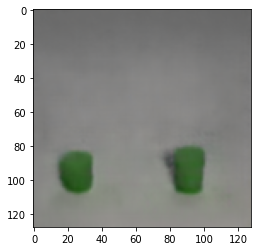

In [36]:
plt.figure()
plt.imshow(np.moveaxis(manip_recons[0, pos_1].detach().cpu().numpy(), [0, 1, 2], [2, 0, 1]) / 2. + 0.5)
plt.show()